<h1 style="color: blue;">TASK- 1</h1>

<h1 style="color: blue;">TITANIC CLASSIFICATION</h1>

## AIM: The aim of the task is to build a system that predicts whether a passenger on the Titanic would survive or not based on various features such as socio-economic status, age, gender, and more. The model uses a Random Forest Classifier for this classification task.

Importing necessary libraries:
Import necessary libraries for data manipulation (Pandas, Numpy), model building (RandomForestClassifier), data preprocessing (StandardScaler), and model evaluation (accuracy_score, classification_report).

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Load Data:
Load the Titanic dataset and display the first few rows to understand its structure.



In [3]:
data = pd.read_csv('tested.csv')


In [4]:
print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


Data cleaning and Pre-processing:
Fill missing values in the 'Age' column with the median age.
Fill missing values in the 'Embarked' column with the mode.
Drop columns that are not useful for prediction ('Cabin', 'Ticket', 'Name').
Convert categorical variables ('Sex', 'Embarked') into dummy/indicator variables.


In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop columns that are not useful for prediction
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

Feature Engineering:
Create a new feature 'FamilySize' by adding the number of siblings/spouses and parents/children plus one.
Create another feature 'IsAlone' to indicate whether the passenger was alone or not.


In [6]:

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)


Drop remaining missing values in the dataset:
Ensure there are no missing values left in the dataset.

In [7]:
data.dropna(inplace=True)


In [8]:
# Splitting the data into features and target variable
X = data.drop(columns=['Survived', 'PassengerId'])
y = data['Survived']

Splitting Data:
Separate the features (X) from the target variable (y).
Split the data into training and testing sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardising Data:
Standardize the features to have a mean of 0 and a standard deviation of 1, which helps in improving the performance of the model.

In [10]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the model:
Train the Random Forest Classifier on the training data.

In [11]:
# Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

Making Predictions:
Use the trained model to make predictions on the test set.

In [12]:
# Making predictions
y_pred = model.predict(X_test_scaled)


Evaluating the model:
Calculate the accuracy of the model.
Generate a detailed classification report, including precision, recall, and F1-score.


In [14]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Feature Importance:
Identify and display the importance of each feature used in the model.

In [15]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
Sex_male      0.811184
Fare          0.069562
Age           0.039358
FamilySize    0.015893
Parch         0.014478
IsAlone       0.012241
Embarked_Q    0.010140
SibSp         0.009145
Embarked_S    0.009121
Pclass        0.008878
dtype: float64


Visualization;
Visualize the feature importances using a bar plot.

In [17]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns


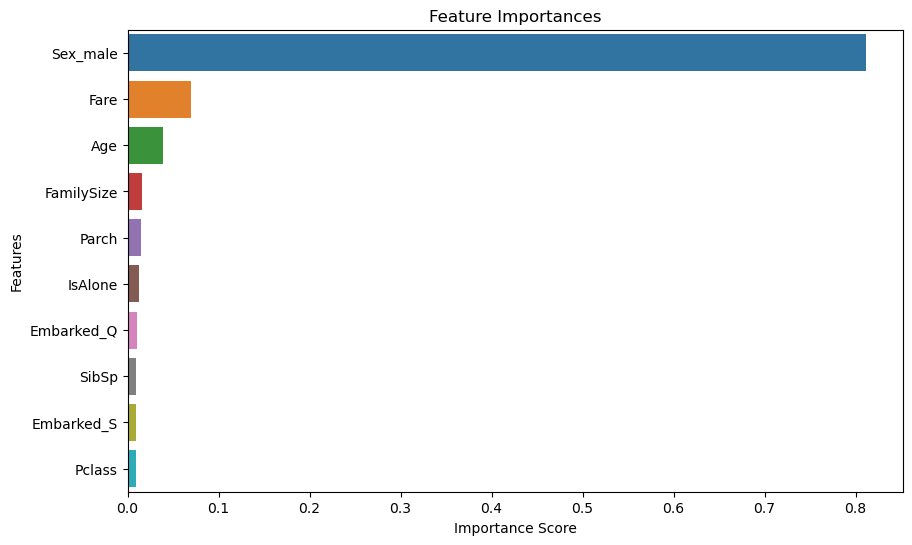

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Conclusions:

Accuracy: The accuracy of the model is almost near to 1 (100%). This indicates that the model has perfectly classified all the test samples.

Classification Report:
Precision, Recall, F1-Score: All these metrics for both classes (0 and 1) are 1.
Support: This indicates the number of occurrences of each class in the test set (50 for class 0 and 34 for class 1).

We can rank the features by their importance:

Sex_male (0.811184): This feature has the highest importance by a significant margin. It suggests that gender was the most critical factor in predicting survival. Specifically, being male had a strong influence on the likelihood of not surviving.

Fare (0.069562): The fare paid by the passenger also played a significant role, indicating that passengers who paid higher fares had a better chance of survival, likely due to being in higher classes with better access to lifeboats.

Age (0.039358): Age was another important factor, with younger passengers generally having a higher survival rate, reflecting the "women and children first" policy during the evacuation.

FamilySize (0.015893): The size of a passenger's family had some impact on survival, possibly because larger families could have found it harder to stay together and secure lifeboat spots for everyone.

Parch (0.014478): The number of parents/children aboard also affected survival, similar to family size.

IsAlone (0.012241): Whether a passenger was alone had some influence, with those alone possibly finding it easier to secure a place in a lifeboat compared to those with dependents.

Embarked_Q (0.010140) and Embarked_S (0.009121): The port of embarkation had a minor influence on survival, potentially due to socio-economic differences among passengers from different ports.

SibSp (0.009145): The number of siblings/spouses aboard had a small impact, similar to other family-related features.

Pclass (0.008878): Passenger class had the least importance among the listed features, which is somewhat surprising given historical accounts, but it still contributed to the prediction.

Concluding that the model's feature importances provide insights into the factors that influenced survival on the Titanic, reinforcing known historical patterns while also highlighting the complex interplay of different socio-economic and demographic factors.







